# 9. Support Vector Machines – Conceptual

Conceptual excercises from **Chapter 9** of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

In [198]:
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. This problem involves hyperplanes in two dimensions.

(a) Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of points for which 1+3X1 −X2 > 0, as well as the set of points for which 1 + 3X1 − X2 < 0.

(b) On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0. Indicate the set of points for which −2 + X1 + 2X2 > 0, as well as the set of points for which −2 + X1 + 2X2 < 0.

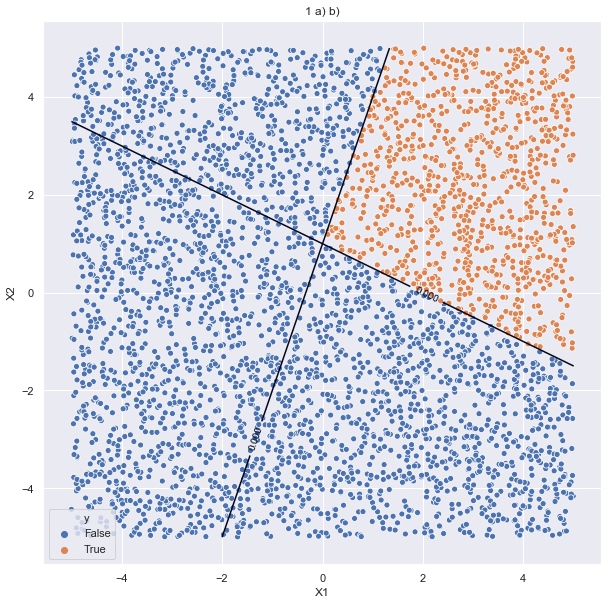

In [145]:
# Draw decision line
x1 = np.linspace(-5.0, 5.0, 100)
x2 = np.linspace(-5.0, 5.0, 100)
X1, X2 = np.meshgrid(x1,x2)
Y1 = 1 + 3*X1 -X2
Y2 = -2 + X1 + 2*X2

# Gen samples
x1 = np.random.uniform(-1, 1, 4000) * 5
x2 = np.random.uniform(-1, 1, 4000) * 5
y1 = ((1 + 3*x1 -x2) > 0)*1
y2 = ((-2 + x1 + 2*x2) > 0)*1
y = np.all([y1, y2], axis=0)

df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

# Plot data
fig, ax = plt.subplots(figsize=(10,10))
CS1 = ax.contour(X1,X2,Y1, [0])
ax.clabel(CS1, inline=1, fontsize=10)
CS2 = ax.contour(X1,X2,Y2, [0])
ax.clabel(CS2, inline=1, fontsize=10)
sns.scatterplot(x='x1', y='x2', hue='y', data=df)
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_title('1 a) b)');

## 2. We have seen that in p = 2 dimensions, a linear decision boundary takes the form β0 +β1X1 +β2X2 = 0. We now investigate a non-linear decision boundary.

(a) Sketch the curve

$(1 + X_1)^2 + (2 − X_2)^2 = 4$

(b) On your sketch, indicate the set of points for which 

$(1 + X_1)^2 + (2 − X_2)^2 > 4$

as well as the set of points for which 

$(1 + X_1)^2 + (2 − X_2)^2 \leq 4$

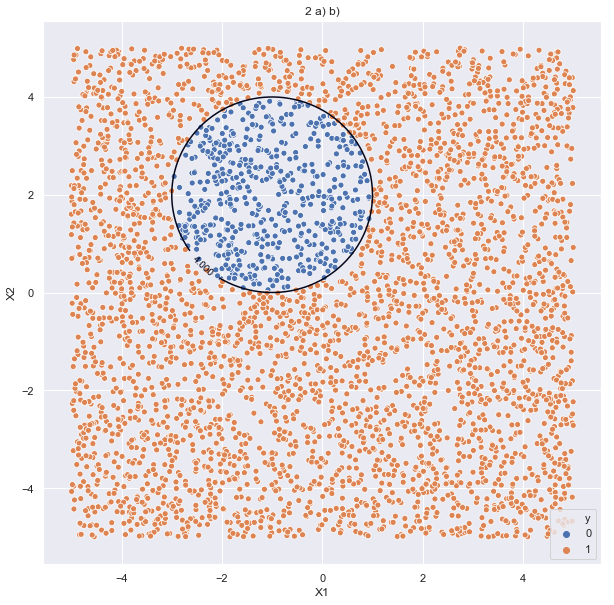

In [111]:
np.random.seed(0)

# Gen samples
x1 = np.random.uniform(-1, 1, 4000) * 5
x2 = np.random.uniform(-1, 1, 4000) * 5
y = 1*(((1+x1)**2 + (2-x2)**2) > 4)
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

# Draw decision line
x1 = np.linspace(-5.0, 5.0, 100)
x2 = np.linspace(-5.0, 5.0, 100)
X1, X2 = np.meshgrid(x1,x2)
Y = (1+X1)**2 + (2-X2)**2

# Plot data
fig, ax = plt.subplots(figsize=(10,10))
CS = ax.contour(X1,X2,Y, [4])
sns.scatterplot(x='x1', y='x2', hue='y', data=df)
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_title('2 a) b)');

(c) Suppose that a classifier assigns an observation to the orange class if

$(1 + X_1)^2 + (2 − X_2)^2 > 4$

and to the blue class otherwise. To what class is the observation (0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?

**Answer**

- (0, 0)  == orange
- (−1, 1) == blue
- (2, 2)  == orange
- (3, 8)  == orange

(d) Argue that while the decision boundary in (c) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$ .

The equation:

$(1 + X_1)^2 + (2 − X_2)^2 > 4$

can be expanded to:

$X_1^2 + 2X_1 + 1 + X_2^2 - 2X_2 + 4 > 4$

$5 + 2X_1- 2X_2 + X_1^2+ X_2^2 > 4$

which can be though of as a linear model of the form:

$β_0 + β_1 X_! + β_2 X_2 + β_3 X_1^2 + β_4 X_2^2 > 4$

where:

$β_0 = 5$  
$β_1 = 2$  
$β_2 = -2$  
$β_3 = 1$  
$β_4 = 1$  


## 3. Here we explore the maximal margin classifier on a toy data set.

(a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

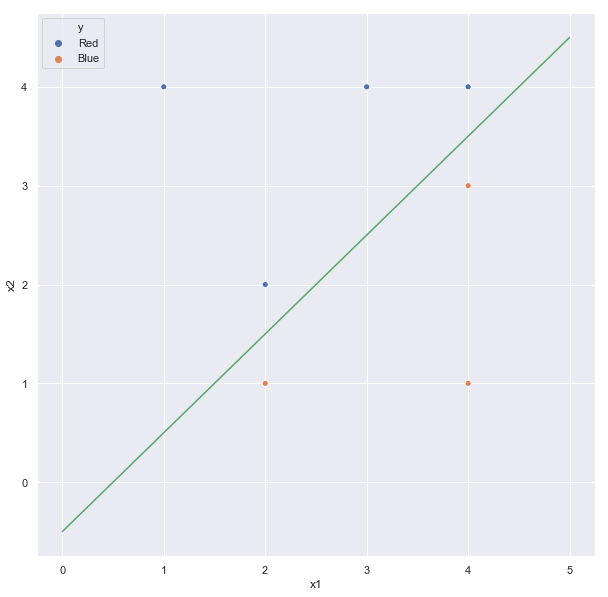

In [186]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

# Draw separating hyperplane
X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5

plot_df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='x1', y='x2', hue='y', data=plot_df)
ax.plot(X1, X2, color='g');

The optimal separating hyperplane is given by:  

$-0.5 + X_1 - X_2 = 0$ 

(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

Classify to Blue if:  

$-0.5 + X_1 - X_2 > 0$ 

and Red otherwise.

(d) On your sketch, indicate the margin for the maximal margin hyperplane.

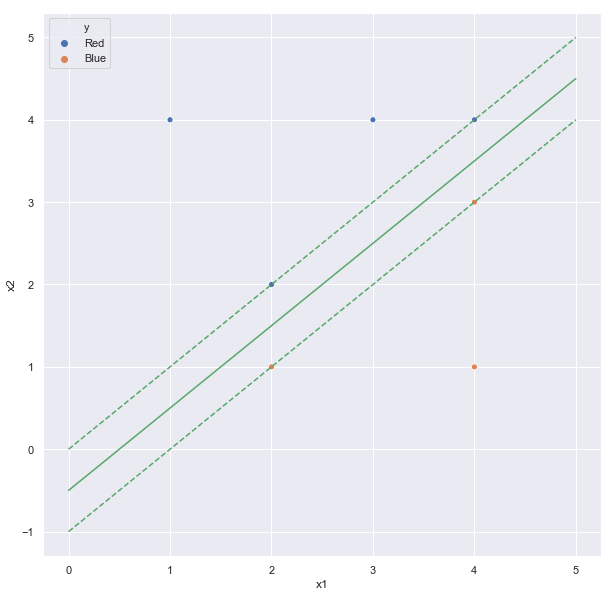

In [180]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

# Draw separating hyperplane
X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5

margin_upper = X1
margin_lower = X1 -1

plot_df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='x1', y='x2', hue='y', data=plot_df)
ax.plot(X1, X2, color='g')
ax.plot(X1, margin_upper, linestyle='--', color='g')
ax.plot(X1, margin_lower, linestyle='--', color='g');

(e) Indicate the support vectors for the maximal margin classifier.

The support vectors are those observations that lie on the dashed margins

(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

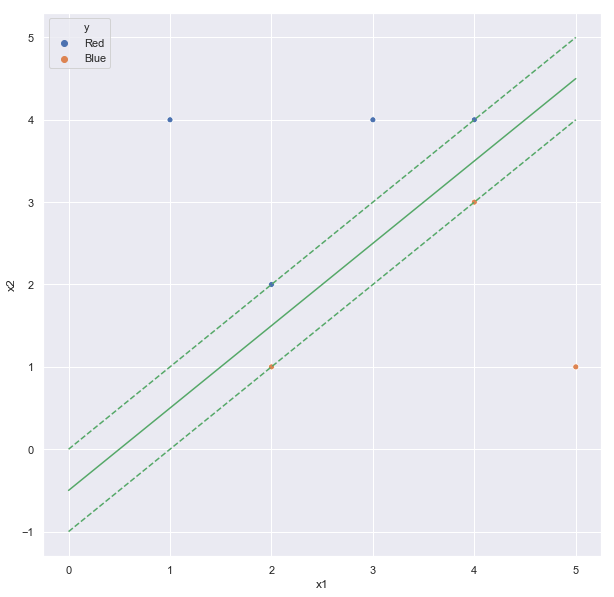

In [182]:
x1 = [3, 2, 4, 1, 2, 4, 5]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

# Draw separating hyperplane
X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5

margin_upper = X1
margin_lower = X1 -1

plot_df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='x1', y='x2', hue='y', data=plot_df)
ax.plot(X1, X2, color='g')
ax.plot(X1, margin_upper, linestyle='--', color='g')
ax.plot(X1, margin_lower, linestyle='--', color='g');

Here I've moved the 7th observation bottom-right by increasing its x1 value by +1. This does not affect the maximal margin hyperplane because this observation is not a support vector. 

If, however, I had decreased the x1 value by -2.5 then this observation would have entered the margin and so would become a support vector, at this point it would begin to have an affect on the maximal margin hyperplan.


(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

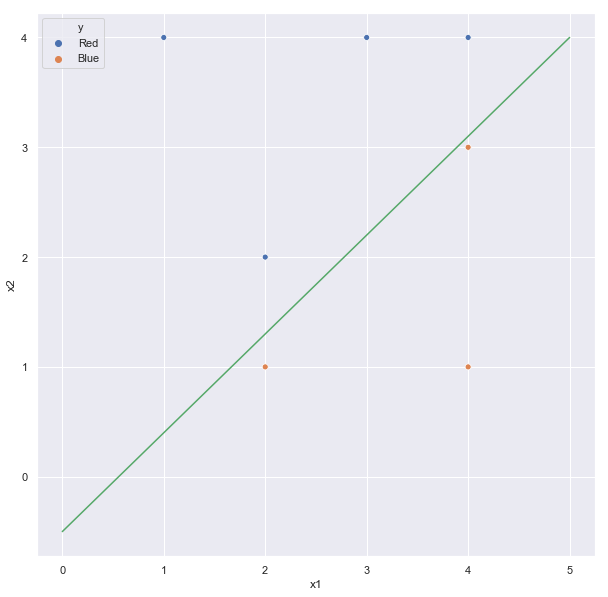

In [193]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

# Draw separating hyperplane
X1 = np.linspace(0, 5, 10)
X2 = 0.9*X1 - 0.5

plot_df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='x1', y='x2', hue='y', data=plot_df)
ax.plot(X1, X2, color='g');

(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

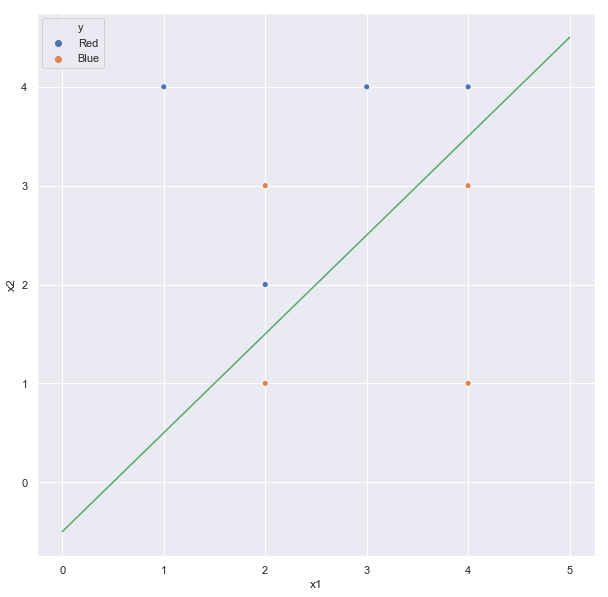

In [197]:
x1 = [3, 2, 4, 1, 2, 4, 4, 2]
x2 = [4, 2, 4, 4, 1, 3, 1, 3]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue']

# Draw separating hyperplane
X1 = np.linspace(0, 5, 10)
X2 = X1 - 0.5

plot_df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='x1', y='x2', hue='y', data=plot_df)
ax.plot(X1, X2, color='g');

I've added the observation (2, 3)